In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
cancer= load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [4]:
data= pd.DataFrame(cancer.data, columns= cancer.feature_names)
pd.options.display.max_columns= None

In [5]:
data['target']= cancer.target

In [6]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [7]:
cancer.DESCR

'Breast Cancer Wisconsin (Diagnostic) Database\n=============================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For instance, field 3 is Mean Rad

In [8]:
Y= data['target']
X= data.drop('target', axis=1)

In [9]:
data.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.25, random_state=10)

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lr= LogisticRegression()

lr.fit(X_train, Y_train)

lr.predict(X_train)
print(metrics.accuracy_score(Y_train, lr.predict(X_train)))

from sklearn import metrics
print(metrics.accuracy_score(Y_test, lr.predict(X_test)))

0.960093896713615
0.9370629370629371


In [15]:
data.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.000111,0.164174,0.039830,-0.090170,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


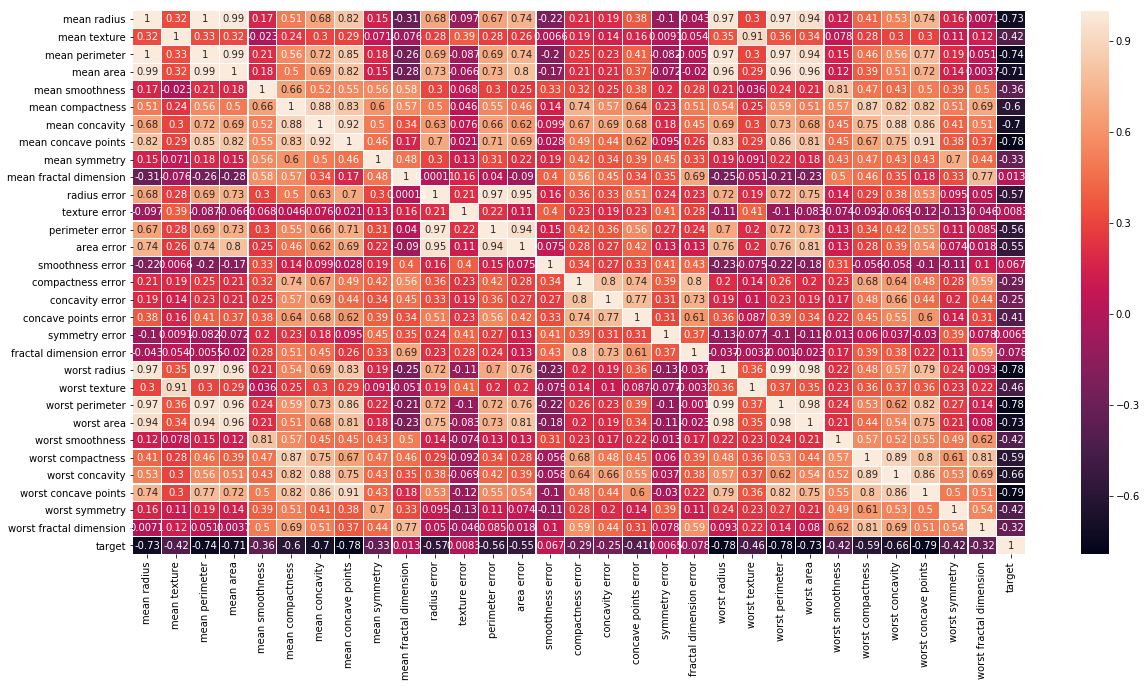

In [16]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), linewidths=0.1, annot=True)

In [18]:
import statsmodels.formula.api as sm
X1, X_train1, X_test1 = X, X_train, X_test

X1= np.append(arr= np.ones(shape=(569,1), dtype=int), values=X1, axis=1 )

reg= sm.OLS(endog=Y, exog=X1).fit()
display(reg.summary())

reg.pvalues.loc[reg.pvalues<=0.1]

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     61.53
Date:                Thu, 20 Jun 2019   Prob (F-statistic):          6.05e-153
Time:                        02:22:56   Log-Likelihood:                 29.650
No. Observations:                 569   AIC:                             2.699
Df Residuals:                     538   BIC:                             137.4
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0218      0.428      7.060      0.000       2.181       3.863
x1             0.2178      0.174      1.255      0.210      -0.123       0.559
x2            -0.0045      0.008     -0.572      0.567      -0.020       0.011
x3            -0.0237      0.025     -0.946      0.345      -0.073       0.026
x4            -0.0003      0.001     -0.605      0.545      -0.001       0.001
x5            -0.0847      2.017     -0.042      0.967      -4.047       3.878
x6             4.2220      1.334      3.166      0.002       1.602       6.842
x7            -1.3980      1.046     -1.337      0.182      -3.452       0.656
x8            -2.1418      1.979     -1.082      0.280      -6.030       1.746
x9            -0.1027      0.743     -0.138      0.890      -1.562       1.356
x10           -0.0333      5.572     -0.006      0.995     -10.979      10.913
x11           -0.4350      0.310     -1.401      0.162      -1.045       0.175
x12            0.0068      0.037      0.183      0.855      -0.066       0.079
x13            0.0225      0.041      0.548      0.584      -0.058       0.103
x14            0.0009      0.001      0.660      0.509      -0.002       0.004
x15          -15.8543      6.625     -2.393      0.017     -28.868      -2.841
x16           -0.0649      2.169     -0.030      0.976      -4.327       4.197
x17            3.5655      1.301      2.741      0.006       1.010       6.121
x18          -10.5680      5.452     -1.938      0.053     -21.278       0.142
x19           -1.6973      2.728     -0.622      0.534      -7.055       3.661
x20            7.1464     11.676      0.612      0.541     -15.791      30.083
x21           -0.1952      0.058     -3.367      0.001      -0.309      -0.081
x22           -0.0072      0.007     -1.030      0.303      -0.021       0.006
x23            0.0024      0.006      0.410      0.682      -0.009       0.014
x24            0.0010      0.000      3.163      0.002       0.000       0.002
x25           -0.5429      1.435     -0.378      0.705      -3.361       2.275
x26           -0.0672      0.383     -0.175      0.861      -0.820       0.685
x27           -0.3812      0.269     -1.419      0.156      -0.909       0.146
x28           -0.4643      0.914     -0.508      0.612      -2.260       1.332
x29           -0.5568      0.494     -1.126      0.260      -1.528       0.414
x30           -4.3035      2.383     -1.806      0.072      -8.985       0.378
==============================================================================
Omnibus:                       32.654   Durbin-Watson:                   1.794
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.690
Skew:                          -0.603   Prob(JB):                     1.08e-08
Kurtosis:                       3.302   Cond. No.                     1.54e+06
==

const    5.156515e-12
x6       1.634686e-03
x15      1.704617e-02
x17      6.327374e-03
x18      5.310331e-02
x21      8.139505e-04
x24      1.647551e-03
x30      7.151650e-02
dtype: float64

In [19]:
X.columns[[6,15,17,21,24]]

Index(['mean concavity', 'compactness error', 'concave points error',
       'worst texture', 'worst smoothness'],
      dtype='object')

In [20]:
data[['mean concavity', 'compactness error', 'concave points error',
       'worst texture', 'worst smoothness', 'target']].corr()

,mean concavity,compactness error,concave points error,worst texture,worst smoothness,target
mean concavity,1.000000,0.670279,0.683260,0.299879,0.448822,-0.696360
compactness error,0.670279,1.000000,0.744083,0.143003,0.227394,-0.292999
concave points error,0.683260,0.744083,1.000000,0.086741,0.215351,-0.408042
worst texture,0.299879,0.143003,0.086741,1.000000,0.225429,-0.456903
worst smoothness,0.448822,0.227394,0.215351,0.225429,1.000000,-0.421465
target,-0.696360,-0.292999,-0.408042,-0.456903,-0.421465,1.000000


In [21]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [22]:
lasso= Lasso(alpha=1)
lasso.fit(X_train, Y_train)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [23]:
lasso.coef_

array([-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -4.44687872e-05,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  2.32163529e-04, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -2.15145448e-03, -4.79909830e-04,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00])

In [24]:
print(lasso.score(X_train, Y_train))
print(lasso.score(X_test, Y_test))

print('no of features used:',np.sum(lasso.coef_!=0))

0.5611602724733924
0.5511494960394097
no of features used: 4


In [25]:
list (zip(cancer.feature_names, lasso.coef_))

[('mean radius', -0.0),
 ('mean texture', -0.0),
 ('mean perimeter', -0.0),
 ('mean area', -4.4468787222719346e-05),
 ('mean smoothness', -0.0),
 ('mean compactness', -0.0),
 ('mean concavity', -0.0),
 ('mean concave points', -0.0),
 ('mean symmetry', -0.0),
 ('mean fractal dimension', -0.0),
 ('radius error', -0.0),
 ('texture error', -0.0),
 ('perimeter error', -0.0),
 ('area error', 0.00023216352921475212),
 ('smoothness error', -0.0),
 ('compactness error', -0.0),
 ('concavity error', -0.0),
 ('concave points error', -0.0),
 ('symmetry error', -0.0),
 ('fractal dimension error', -0.0),
 ('worst radius', -0.0),
 ('worst texture', -0.0),
 ('worst perimeter', -0.002151454481929244),
 ('worst area', -0.00047990982953480206),
 ('worst smoothness', -0.0),
 ('worst compactness', -0.0),
 ('worst concavity', -0.0),
 ('worst concave points', -0.0),
 ('worst symmetry', -0.0),
 ('worst fractal dimension', -0.0)]

In [26]:
lasso01= Lasso(alpha=0.01)
lasso01.fit(X_train, Y_train)

print(np.sum(lasso01.coef_!=0))

print(lasso01.score(X_train, Y_train))
print(lasso01.score(X_test, Y_test))

7
0.6916610535363639
0.6495550361994908


In [28]:
lasso001= Lasso(alpha=0.001, max_iter=100000)
lasso001.fit(X_train, Y_train)

print(np.sum(lasso001.coef_!=0))

print(lasso001.score(X_train, Y_train))
print(lasso001.score(X_test, Y_test))



14
0.7448342853465229
0.7111756829747373


[Text(0,0,'mean radius'),
 Text(0,0,'mean texture'),
 Text(0,0,'mean perimeter'),
 Text(0,0,'mean area'),
 Text(0,0,'mean smoothness'),
 Text(0,0,'mean compactness'),
 Text(0,0,'mean concavity'),
 Text(0,0,'mean concave points'),
 Text(0,0,'mean symmetry'),
 Text(0,0,'mean fractal dimension'),
 Text(0,0,'radius error'),
 Text(0,0,'texture error'),
 Text(0,0,'perimeter error'),
 Text(0,0,'area error'),
 Text(0,0,'smoothness error'),
 Text(0,0,'compactness error'),
 Text(0,0,'concavity error'),
 Text(0,0,'concave points error'),
 Text(0,0,'symmetry error'),
 Text(0,0,'fractal dimension error'),
 Text(0,0,'worst radius'),
 Text(0,0,'worst texture'),
 Text(0,0,'worst perimeter'),
 Text(0,0,'worst area'),
 Text(0,0,'worst smoothness'),
 Text(0,0,'worst compactness'),
 Text(0,0,'worst concavity'),
 Text(0,0,'worst concave points'),
 Text(0,0,'worst symmetry'),
 Text(0,0,'worst fractal dimension')]

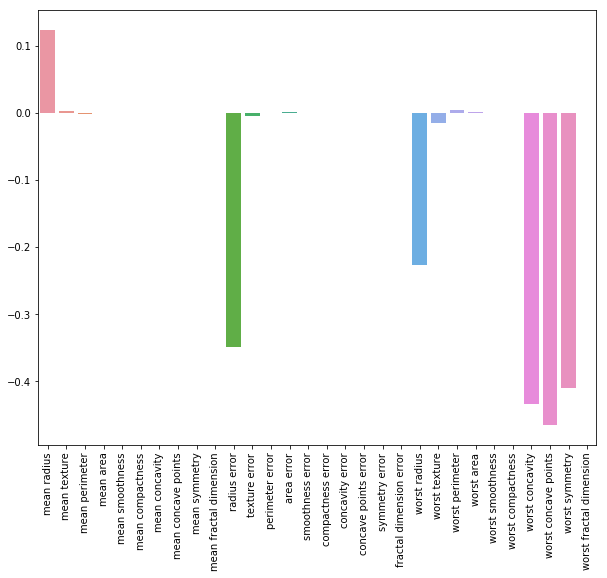

In [29]:
plt.figure(figsize=(10,8))
plot1=sns.barplot(X_train.columns,lasso001.coef_)
plot1.set_xticklabels(plot1.get_xticklabels(), rotation=90)

In [31]:
lasso0001= Lasso(alpha=0.0001, max_iter=100000)
lasso0001.fit(X_train, Y_train)

print(np.sum(lasso0001.coef_!=0))

print(lasso0001.score(X_train, Y_train))
print(lasso0001.score(X_test, Y_test))



21
0.771668456158482
0.7331357964095943


[Text(0,0,'mean radius'),
 Text(0,0,'mean texture'),
 Text(0,0,'mean perimeter'),
 Text(0,0,'mean area'),
 Text(0,0,'mean smoothness'),
 Text(0,0,'mean compactness'),
 Text(0,0,'mean concavity'),
 Text(0,0,'mean concave points'),
 Text(0,0,'mean symmetry'),
 Text(0,0,'mean fractal dimension'),
 Text(0,0,'radius error'),
 Text(0,0,'texture error'),
 Text(0,0,'perimeter error'),
 Text(0,0,'area error'),
 Text(0,0,'smoothness error'),
 Text(0,0,'compactness error'),
 Text(0,0,'concavity error'),
 Text(0,0,'concave points error'),
 Text(0,0,'symmetry error'),
 Text(0,0,'fractal dimension error'),
 Text(0,0,'worst radius'),
 Text(0,0,'worst texture'),
 Text(0,0,'worst perimeter'),
 Text(0,0,'worst area'),
 Text(0,0,'worst smoothness'),
 Text(0,0,'worst compactness'),
 Text(0,0,'worst concavity'),
 Text(0,0,'worst concave points'),
 Text(0,0,'worst symmetry'),
 Text(0,0,'worst fractal dimension')]

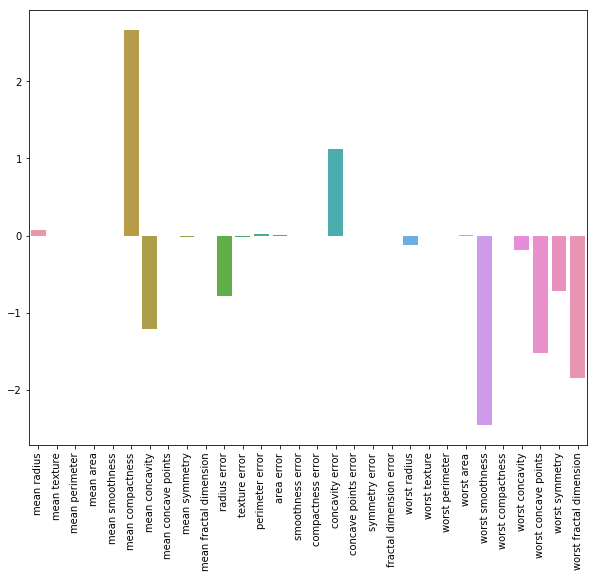

In [32]:
plt.figure(figsize=(10,8))
plot1=sns.barplot(X_train.columns,lasso0001.coef_)
plot1.set_xticklabels(plot1.get_xticklabels(), rotation=90)

In [33]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,Y_train)

lr_train_score=lr.score(X_train,Y_train)
lr_test_score=lr.score(X_test,Y_test)

coeff_lr = np.sum(lr.coef_!=0)

print ("LR training score:", lr_train_score)
print ("LR test score: ", lr_test_score)
print ("number of features used: for alpha =0.0001:", coeff_lr)

LR training score: 0.7840537668046406
LR test score:  0.7186530023331783
number of features used: for alpha =0.0001: 30


In [34]:
a= pd.DataFrame(lasso0001.coef_, index= X.columns, columns=['coffecient'])

Xtrain= X_train[list(a['coffecient'].loc[a['coffecient']!=0].index)]
Xtest= X_test[list(a['coffecient'].loc[a['coffecient']!=0].index)]

lm1 = LogisticRegression()
lm1.fit(Xtrain, Y_train)

print(metrics.accuracy_score(Y_train, lm1.predict(Xtrain)))
print(metrics.accuracy_score(Y_test, lm1.predict(Xtest)))

0.9577464788732394
0.9370629370629371


In [35]:
b= pd.DataFrame(lasso001.coef_, index= X.columns, columns=['coffecient'])

Xtrain1= X_train[list(b['coffecient'].loc[b['coffecient']!=0].index)]
Xtest1= X_test[list(b['coffecient'].loc[b['coffecient']!=0].index)]

lm2 = LogisticRegression()
lm2.fit(Xtrain1, Y_train)

print(metrics.accuracy_score(Y_train, lm2.predict(Xtrain1)))
print(metrics.accuracy_score(Y_test, lm2.predict(Xtest1)))


0.9553990610328639
0.9370629370629371


In [36]:
c= pd.DataFrame(lasso01.coef_, index= X.columns, columns=['coffecient'])

Xtrain2= X_train[list(c['coffecient'].loc[c['coffecient']!=0].index)]
Xtest2= X_test[list(c['coffecient'].loc[c['coffecient']!=0].index)]

lm3 = LogisticRegression()
lm3.fit(Xtrain2, Y_train)

print(metrics.accuracy_score(Y_train, lm3.predict(Xtrain2)))
print(metrics.accuracy_score(Y_test, lm3.predict(Xtest2)))


0.9460093896713615
0.9300699300699301


In [39]:
d= pd.DataFrame(lasso.coef_, index= X.columns, columns=['coffecient'])

Xtrain3= X_train[list(d['coffecient'].loc[d['coffecient']!=0].index)]
Xtest3= X_test[list(d['coffecient'].loc[d['coffecient']!=0].index)]

lm4 = LogisticRegression()
lm4.fit(Xtrain3, Y_train)

print(metrics.accuracy_score(Y_train, lm4.predict(Xtrain3)))
print(metrics.accuracy_score(Y_test, lm4.predict(Xtest3)))

0.9178403755868545
0.9370629370629371
